In [1]:
import pandas as pd
data = pd.read_csv("heart.csv")

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
age         1025 non-null int64
sex         1025 non-null int64
cp          1025 non-null int64
trestbps    1025 non-null int64
chol        1025 non-null int64
fbs         1025 non-null int64
restecg     1025 non-null int64
thalach     1025 non-null int64
exang       1025 non-null int64
oldpeak     1025 non-null float64
slope       1025 non-null int64
ca          1025 non-null int64
thal        1025 non-null int64
target      1025 non-null int64
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [3]:
data.describe()
# No missing values - heart attack averted

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
data.dtypes.value_counts()
# 13 integer features (includes the target)
# 1 float feature called oldpeak

int64      13
float64     1
dtype: int64

In [5]:
# Checking for missing values
data.isnull().sum() # Glad to see all zeroes

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
data.isnull().any() # No null values in any columns

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
# Target variable
# sns.countplot(data['target']) # This will also give the same graph, 
plt.style.use('ggplot')
sns.set_style('whitegrid')

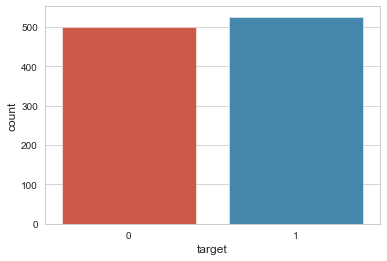

In [8]:
# Target Variable
sns.countplot(x=data['target']) # but value_counts() will just count the value first - easy on memory

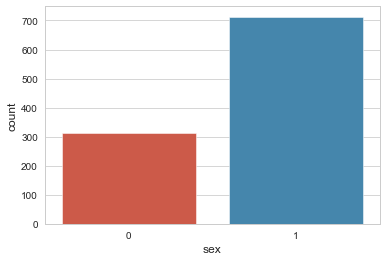

In [9]:
# Sex
sns.countplot(data['sex'])

    ageBin
60     247
55     191
65     161
45     145
50     102
70      91
40      43
35      21
75      14
80       6
30       4


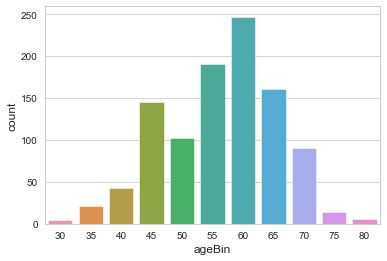

In [10]:
# Age distribution
pd.DataFrame(data['age'].describe())
data['ageBin'] = pd.cut(x=data.age, bins=[0, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80], labels=[30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80])
'''
(0, 30] -- 1
(30, 35] -- 6
etc
'''
# Here, a new col is created
# If the age is <30, the col value for that record will be 30
# Personal Note: This will be a good function to use in monte carlo simulation
print(pd.DataFrame(data['ageBin'].value_counts()))
# Visualizing the above result in sns
sns.countplot(data['ageBin'])

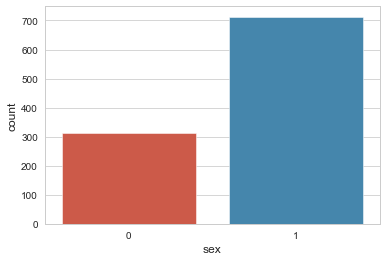

In [11]:
# Sex distribution
pd.DataFrame(data['sex'].value_counts())
sns.countplot(data['sex'])

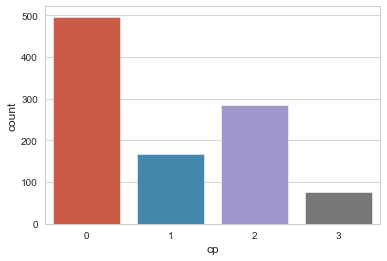

In [12]:
# CP: Chest Pain type
pd.DataFrame(data['cp'].value_counts())
sns.countplot(data['cp'])
# I'm no doctor, but I guess it is nominal 4 valued categorical from the dataset documentation
# Value 1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4: asymptomatic
# In dataset, value starts from 0

range(125, 601, 50)


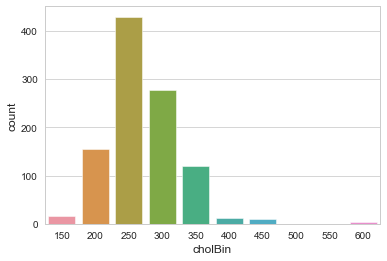

In [13]:
# Cholestrol
pd.DataFrame(data['chol'].describe())
# Min is 126(Vegan for sure), max is 564(Holy Crap, I would like his diet)
# Lets sort these into bins
'''
(125, 150],
(150, 200],
...,
(550, 600]
'''
print(range(125, 601, 50))
mylist = list(range(150, 601, 50))
mylist.append(125)
mylist.sort()
mylist
data['cholBin'] = pd.cut(data.chol, bins=mylist, labels=list(range(150, 601, 50)))
pd.DataFrame(data['cholBin'].value_counts())
sns.countplot(data['cholBin'])

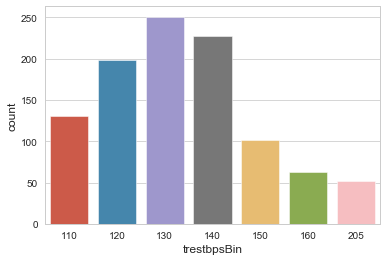

In [14]:
# trestbps
# It is the resting blood pressure on admission at the hospital
# Numerical Value
data['trestbps'].describe() # This also works
# data.trestbps.describe() # This also works
# Min is 84 mm Hg, max is 200 mm Hg (The nurse who took his BP might be hot)
data['trestbpsBin'] = pd.cut(data.trestbps, bins=[93, 110, 120, 130, 140, 150, 160, 205], labels=[110, 120, 130, 140, 150, 160, 205])
data['trestbpsBin'].value_counts()
sns.countplot(data.trestbpsBin) # This also works
# sns.countplot(data['trestbpsBin'])

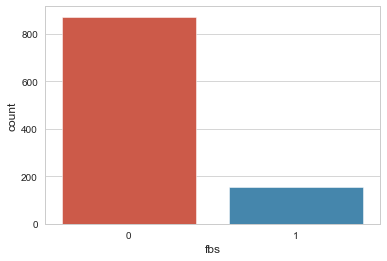

In [15]:
# FBS
# Will be 1 if the fasting blood sugar is higher than the normal 120 mg/dl
data.fbs.unique()
# Two values = 1 and 0
sns.countplot(data.fbs)

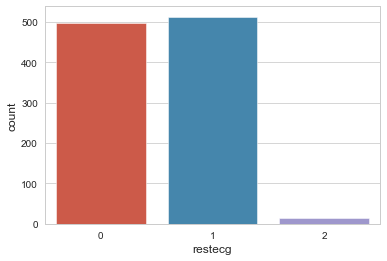

In [16]:
# restecg
# Resting ECG results
data.restecg.unique()
# We get three values
# restecg: resting electrocardiographic results -- Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 20
# What I understood is 0 is normal, 1 is pretty bad and 2 is fucked up
# Therefore ordinal categorical
sns.countplot(data.restecg)

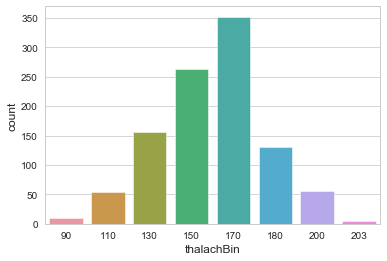

In [17]:
# thalach
# Maximum heart rate achieved
data.thalach.unique()
# Integer numerical value
data.thalach.describe()
# min is 71
# max is 202
data['thalachBin'] = pd.cut(data.thalach, bins=[70, 90, 110, 130, 150, 170, 180, 200, 203], labels=[90, 110, 130, 150, 170, 180, 200, 203])
data.thalachBin.value_counts()
sns.countplot(data.thalachBin) # Is that a normal distributioin I see?

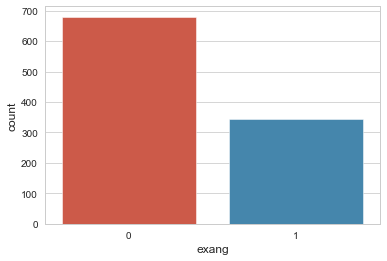

In [18]:
# exang
# Exercise included?
# 1 is Yes, 0 is No
sns.countplot(data.exang)

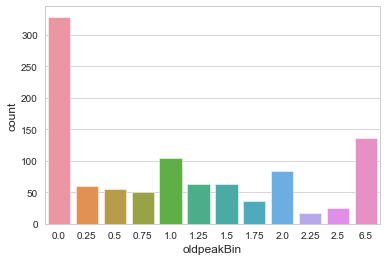

In [19]:
# oldpeak
# ST depression induced due to exercise relative to rest
# ST means something Thoracic - some chest measure as I remember from data's doc and paper
data.oldpeak.describe()
# min is 0, max is 6.2
# float value
# sns.countplot(data.oldpeak) # isnt working well, need to discretize this
data['oldpeakBin'] = pd.cut(data.oldpeak, 
    bins=[-0.1, 0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 6.5],
    labels=[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 6.5])
sns.countplot(data.oldpeakBin)

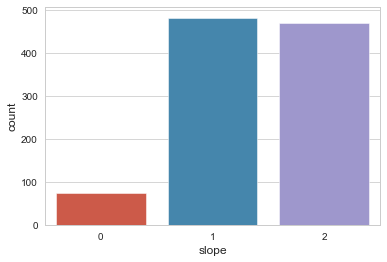

In [20]:
# Slope
# the slope of the peak exercise ST segment -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping
# I'm guessing ordinal categorical
sns.countplot(data.slope)

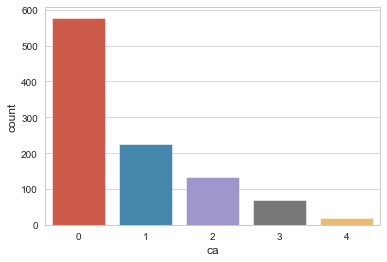

In [21]:
# ca
# number of major vessels (0-3) colored by flourosopy
data.ca.unique()
sns.countplot(data.ca)

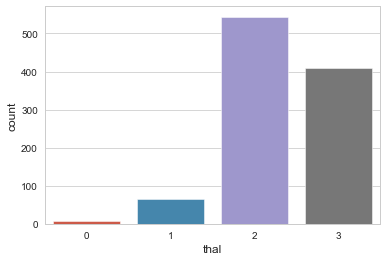

In [22]:
# thal
# thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
data.thal.unique()
sns.countplot(data.thal)
# I cant find this in the data's doc, I dont know whether to take it as ordinal or nominal

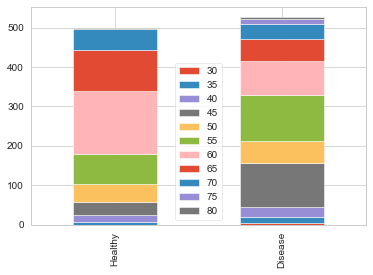

In [23]:
# Age with respect to heart disease
target1 = data[data['target']==1]['ageBin'].value_counts()
target0 = data[data['target']==0]['ageBin'].value_counts()
temp = pd.DataFrame([target0, target1])
temp.index = ['Healthy', 'Disease']
temp.plot(kind='bar', stacked=True)

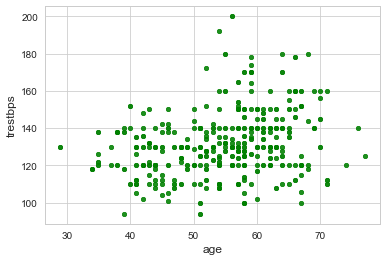

In [24]:
# Relationship between age and trestbps
data.plot(kind='scatter', x='age', y='trestbps', color='green', alpha=0.5)
# More people will have higher blood pressure as they age

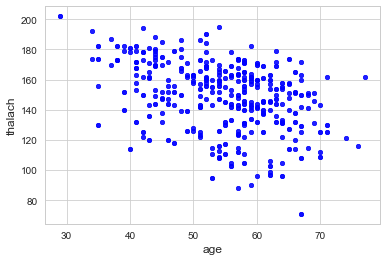

In [25]:
# Relationship between age and maximum heartrate acheived
data.plot(kind='scatter', x='age', y='thalach', color='blue', alpha=0.5)
# As you age, the maximum heart rate you can achieve will gradually reduce

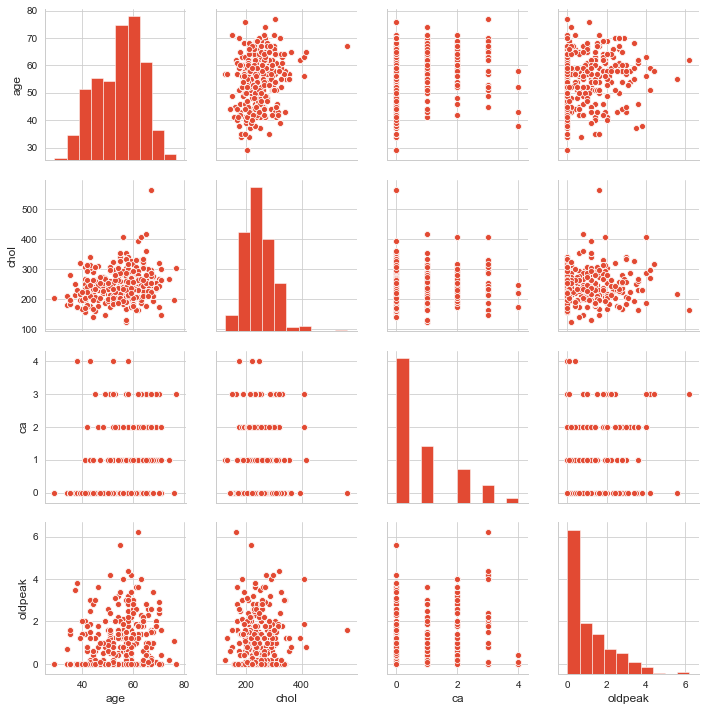

In [26]:
# Relationships between age, cholestrol, ca and oldpeak
sns.pairplot(data.loc[:, ['age', 'chol', 'ca', 'oldpeak']])

In [27]:
# Correlation Matrix
dataCorr = data.corr()['target'][:-1] # Last row is the target
# Now take the most correlated features
goldFeaturesList = dataCorr[abs(dataCorr) > 0.1].sort_values()
# So the strongly correlated features with the target are
goldFeaturesList

oldpeak    -0.438441
exang      -0.438029
ca         -0.382085
thal       -0.337838
sex        -0.279501
age        -0.229324
trestbps   -0.138772
restecg     0.134468
slope       0.345512
thalach     0.422895
cp          0.434854
Name: target, dtype: float64

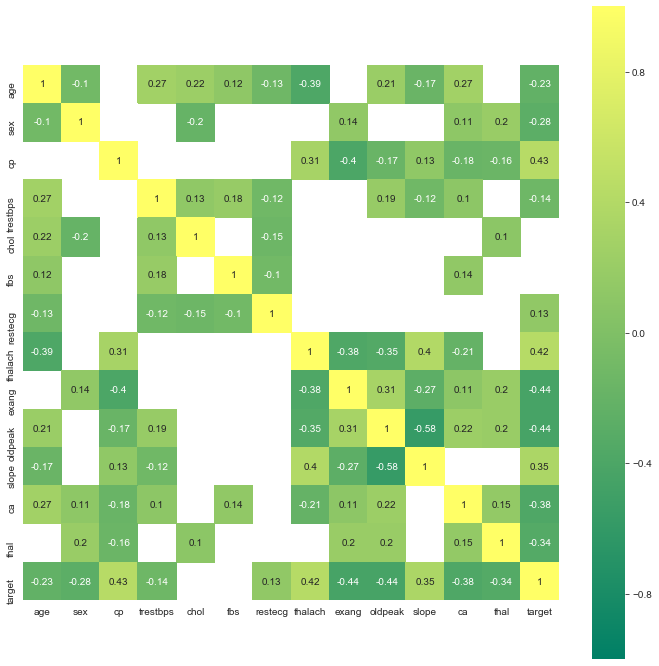

In [28]:
# Drawing the correlation matrix
corr = data.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(data=corr[abs(corr) > 0.1], vmin=-1, vmax=1, cmap='summer', annot=True, cbar=True, square=True)